In [6]:
fname='IMPACTS2023_HIWRAP_KuKa_15Jan2023'
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
with nc.Dataset(fname+'.nc') as f:
    zKu=f['zKu'][:]
    zKa=f['zKa'][:]
    ml=f['ml'][:]
    cl=f['cl'][:]
    height=f['height'][:]
    lon=f['lon'][:]


(2000, 609)
(2000, 609)
(2000,)


/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_3399/1688795837.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlon,height/1e3,zKu,vmin=0,vmax=40,cmap='jet')
/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_3399/1688795837.py:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlon,height/1e3,zKa,vmin=0,vmax=40,cmap='jet')


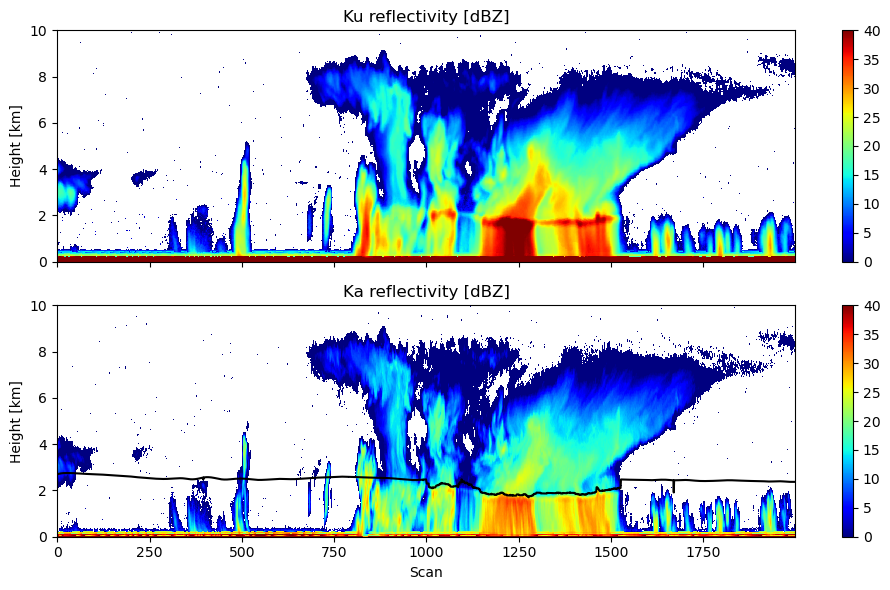

In [7]:
print(zKu.shape)
print(height.shape)
print(lon.shape)
xlon=np.array([range(lon.shape[0]) for k in range(609)]).T
plt.figure(figsize=(10,6))
ax=plt.subplot(211)
plt.pcolormesh(xlon,height/1e3,zKu,vmin=0,vmax=40,cmap='jet')
ax.axes.set_xticklabels([])
plt.ylim(0,10)
plt.ylabel('Height [km]')
plt.colorbar()
plt.title('Ku reflectivity [dBZ]')
plt.subplot(212)
plt.pcolormesh(xlon,height/1e3,zKa,vmin=0,vmax=40,cmap='jet')

plt.ylim(0,10)
hml=[height[k,ml[k,0]] for k in range(ml.shape[0])]
plt.plot(range(lon.shape[0]),np.array(hml)/1e3,'k')
plt.colorbar()
plt.ylabel('Height [km]')
plt.xlabel('Scan')
plt.title('Ka reflectivity [dBZ]')
plt.tight_layout()
plt.savefig('15Jan2023_reflectivity.png')
plt.show()

In [33]:
print(hml)
import pickle#
#d={'rel_range':rel_range[0],'precip_rate_cmb_log_mean':precip_rate_cmb_log_mean,'precip_rate_cmb_log_std':precip_rate_cmb_log_std,'scalerZ':scalerZ,'scalerPrecip':scalerPrecip}
#with open('dpr_cmb_training.pkl','wb') as f:
#    pickle.dump(d,f)
d=pickle.load(open('dpr_cmb_training.pkl','rb'))
rel_range=d['rel_range']
scalerZ=d['scalerZ']
scalerPrecip=d['scalerPrecip']
precip_rate_cmb_log_mean=d['precip_rate_cmb_log_mean']
precip_rate_cmb_log_std=d['precip_rate_cmb_log_std']
zku_regL=[]
for i in range(800,1500):
    range_aircraft=-(height[i,:]/1e3-height[i,ml[i,0]]/1e3)
    zku_reg=np.interp(rel_range,range_aircraft,zKu[i,:])
    zku_regL.append(zku_reg)
    #break

[2705.0015934097755, 2708.7636663638004, 2712.628974365496, 2716.300082275582, 2720.0549713354994, 2723.5170935462484, 2726.933930868723, 2729.9873042815125, 2732.952142529746, 2735.569291444328, 2738.051888827402, 2740.2577961394345, 2742.3691736368346, 2744.190735566048, 2745.9274950254767, 2747.423775577463, 2748.816631079113, 2749.971807244903, 2751.0130807782625, 2751.859421976871, 2752.607894341105, 2753.1892173616397, 2753.667842216346, 2754.0003293089176, 2754.235757568764, 2754.3645880913537, 2754.4117991583225, 2754.377544473744, 2754.2642929072936, 2754.094875340059, 2753.8626973382634, 2753.601697043887, 2753.291248070629, 2752.973370808835, 2752.621821536679, 2752.2714142217337, 2751.8921953404206, 2751.50948437232, 2751.087831874891, 2750.660024806464, 2750.1834058633176, 2749.698446229744, 2749.1671295975502, 2748.6275507204045, 2748.0345755618146, 2747.428712373461, 2746.7517835599137, 2746.06573858493, 2745.311899082313, 2744.55597372229, 2743.7227219604465, 2742.88396

[ 5.28872708  6.39298226  8.01757018  8.31288242  9.13598728 13.23797503
 16.15619714 16.16947574 15.53924324 15.31245531 15.0842034  15.33929343
 15.21715832 14.53141321 14.08198593 13.64640849 12.77617673 12.04087575
 11.69459316 12.09519813 12.05852018 12.67744487 13.33954988 14.02870383
 14.06173611 14.06614612 14.27907671 14.07628618 13.33693409 12.63990039
 11.63226427 10.99158128 10.04806469  9.94817666  9.73005799  9.70078682
  9.53502355  9.85281013  9.50507132  9.44766821  9.64570877  9.72637785
  9.56546361  9.49363481  9.4585158   9.83397961 11.80649326 14.60138798
 16.18855204 17.71170207 20.22871072 20.79190636 20.92453384 20.98562431
 21.06135641 20.95039686 21.02143433 21.88229997 23.14599182 24.30923208
 24.24638966 23.39706557 22.76696069 23.54828017 41.76295726 72.46788715
 71.40042114 38.66368139]
[1.625 1.75 1.875 2.0 2.125 2.25 2.375 2.5 2.625 2.75]
0


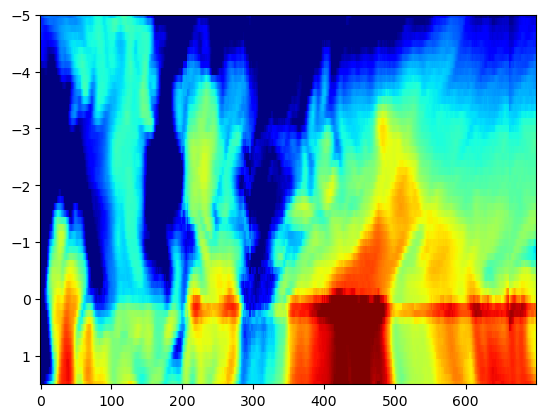

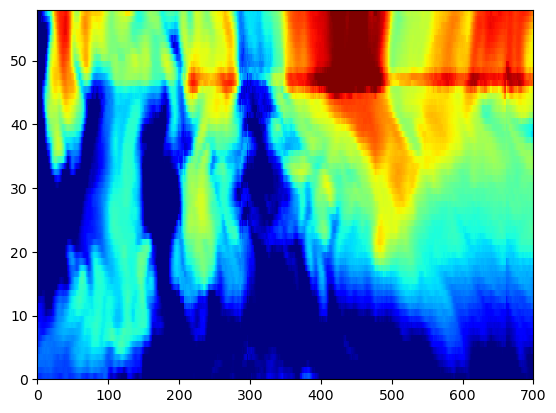

In [35]:

print(zku_regL[100])
print(rel_range[-10:])
zku_regL=np.array(zku_regL)
a=np.nonzero(np.isnan(zku_regL))
zku_regL[a]=-10
print(len(a[0]))
plt.pcolormesh(range(len(zku_regL)),rel_range,np.array(zku_regL).T,vmin=0,vmax=40,cmap='jet')
plt.ylim(1.5,-5)

zku_truncated=zku_regL[:,:-10]
plt.figure()
plt.pcolormesh(zku_truncated.T,vmin=0,vmax=40,cmap='jet')
zku_scaled=(zku_truncated-scalerZ.mean_[100:-10])/scalerZ.scale_[100:-10]

In [38]:

x2=[rel_range[:-10] for k in range(zku_scaled.shape[0])]
xL=np.array([zku_scaled,x2]).transpose(1,2,0)
print(xL.shape)
import torch
model=torch.jit.load("lstm_uncertainty_model.pt")
y_pred=model(torch.tensor(xL).float())

(700, 58, 2)


In [55]:
mean=y_pred[0].detach().numpy()
precip_pred=np.exp(mean[:,:,0]*precip_rate_cmb_log_std[:-10]+precip_rate_cmb_log_mean[:-10])-1

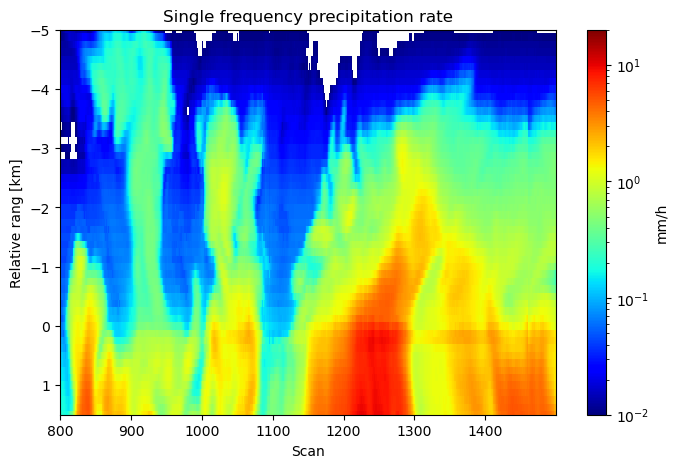

In [62]:
import matplotlib
plt.figure(figsize=(8,5))
precip_predm=np.ma.array(precip_pred,mask=precip_pred<0.01)
plt.pcolormesh(800+np.arange(len(zku_scaled)),rel_range[:-10],precip_predm.T,cmap='jet',norm=matplotlib.colors.LogNorm(vmin=0.01,vmax=20))
plt.xlabel('Scan')
plt.ylabel('Relative rang [km]')
plt.title('Single frequency precipitation rate')
plt.ylim(1.5,-5)
plt.colorbar(label='mm/h')
plt.tight_layout
plt.savefig('SF_15Jan2023_precip.png',dpi=300)